### 1. Image extraction by video frame

In [1]:
from scipy.signal import butter, lfilter, detrend
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 2. Extract RGB values

In [2]:
vidcap2 = cv2.VideoCapture('test.mp4')

count = 0

while vidcap2.isOpened():
    ret, image = vidcap2.read()
    
    # 전체 프레임 중 1/5만 저장
    if(int(vidcap2.get(1)) % 5 == 0):
        cv2.imwrite("frame%d.png" % count, image)
        print('Saved frame number : ' + str(int(vidcap2.get(1))))
        count += 1
    elif not(ret):
        break  
        
vidcap2.release()

Saved frame number : 5
Saved frame number : 10
Saved frame number : 15
Saved frame number : 20
Saved frame number : 25
Saved frame number : 30
Saved frame number : 35
Saved frame number : 40
Saved frame number : 45
Saved frame number : 50
Saved frame number : 55
Saved frame number : 60
Saved frame number : 65
Saved frame number : 70
Saved frame number : 75
Saved frame number : 80
Saved frame number : 85
Saved frame number : 90
Saved frame number : 95
Saved frame number : 100
Saved frame number : 105
Saved frame number : 110
Saved frame number : 115
Saved frame number : 120
Saved frame number : 125
Saved frame number : 130
Saved frame number : 135
Saved frame number : 140
Saved frame number : 145
Saved frame number : 150
Saved frame number : 155
Saved frame number : 160
Saved frame number : 165
Saved frame number : 170
Saved frame number : 175
Saved frame number : 180
Saved frame number : 185
Saved frame number : 190
Saved frame number : 195
Saved frame number : 200
Saved frame number :

In [3]:
avg_red_2 = []
avg_green_2 = []
avg_blue_2 = []

for i in range(count):
    # image 로부터 RGB 값 추출
    image = cv2.imread("frame{}.png".format(i))
    blue,green,red = cv2.split(image)

    # RGB 값 저장 (1초 당 5fps, 5프레임 마다 값 추출, 0.033초 마다 RGB값 추출)
    avg_red_2.append((i/30*5, red.mean()))
    avg_green_2.append((i/30*5, green.mean()))
    avg_blue_2.append((i/30*5, blue.mean()))

In [4]:
avg_red_2 = np.asarray(avg_red_2)
avg_green_2 = np.asarray(avg_green_2)
avg_blue_2 = np.asarray(avg_blue_2)

In [5]:
avg_red_2

array([[0.00000000e+00, 1.81328379e+02],
       [1.66666667e-01, 1.79710058e+02],
       [3.33333333e-01, 1.81617169e+02],
       [5.00000000e-01, 1.81935104e+02],
       [6.66666667e-01, 1.81671346e+02],
       [8.33333333e-01, 1.78225137e+02],
       [1.00000000e+00, 1.81992747e+02],
       [1.16666667e+00, 1.82527840e+02],
       [1.33333333e+00, 1.81814042e+02],
       [1.50000000e+00, 1.78772880e+02],
       [1.66666667e+00, 1.82402420e+02],
       [1.83333333e+00, 1.82896541e+02],
       [2.00000000e+00, 1.82080874e+02],
       [2.16666667e+00, 1.77380128e+02],
       [2.33333333e+00, 1.83406079e+02],
       [2.50000000e+00, 1.82895550e+02],
       [2.66666667e+00, 1.81806616e+02],
       [2.83333333e+00, 1.78849341e+02],
       [3.00000000e+00, 1.83633570e+02],
       [3.16666667e+00, 1.82428227e+02],
       [3.33333333e+00, 1.82294728e+02],
       [3.50000000e+00, 1.81920477e+02],
       [3.66666667e+00, 1.80936958e+02],
       [3.83333333e+00, 1.82828589e+02],
       [4.000000

### 3. Plot RGB values

<function matplotlib.pyplot.show(close=None, block=None)>

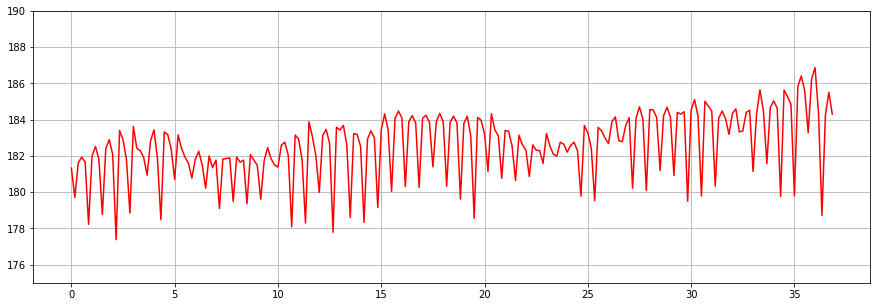

In [6]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(avg_red_2[:,0],avg_red_2[:,1], color = 'red')
ax.set_ylim(175,190)
ax.grid(True)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

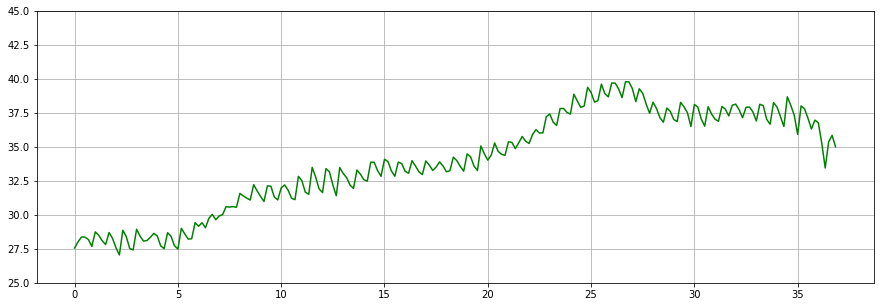

In [7]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(avg_green_2[:,0],avg_green_2[:,1], color = 'green')
ax.set_ylim(25,45)
ax.grid(True)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

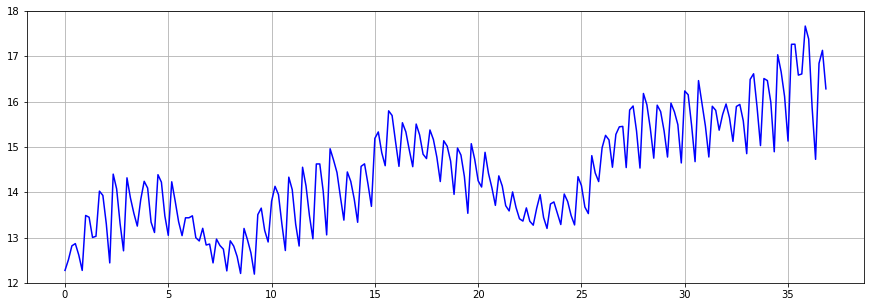

In [8]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(avg_blue_2[:,0],avg_blue_2[:,1], color = 'blue')
ax.set_ylim(12,18)
ax.grid(True)

plt.show

### 4. Remove DC components

In [9]:
avg_red_2_1 = avg_red_2.copy()
avg_red_2_1[:,1] = detrend(avg_red_2_1[:,1])

<function matplotlib.pyplot.show(close=None, block=None)>

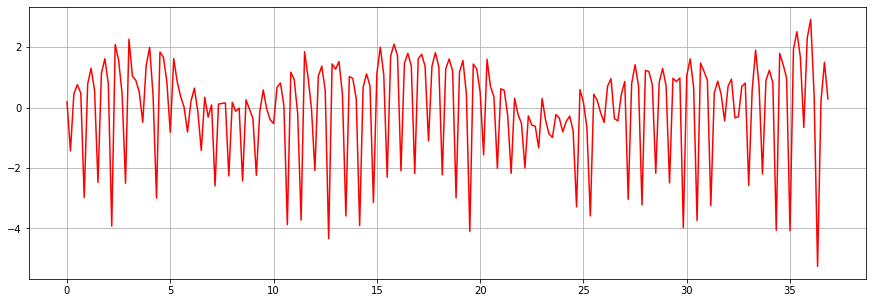

In [10]:
# Remove the DC
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(avg_red_2_1[:,0],avg_red_2_1[:,1], color = 'red')
ax.grid(True)

plt.show

### 5. Butterworth filtering

In [11]:
def butter_bandpass(lowcut, highcut, fs, order = 5):
    nyq = 0.5 * fs # fs는 sampling rate, fs/2를 나이퀴스트 주파수(nyq)라고 함
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype = 'band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order = 5):
    b, a = butter_bandpass(lowcut, highcut, fs, order = order)
    y = lfilter(b, a, data)
    return y

<function matplotlib.pyplot.show(close=None, block=None)>

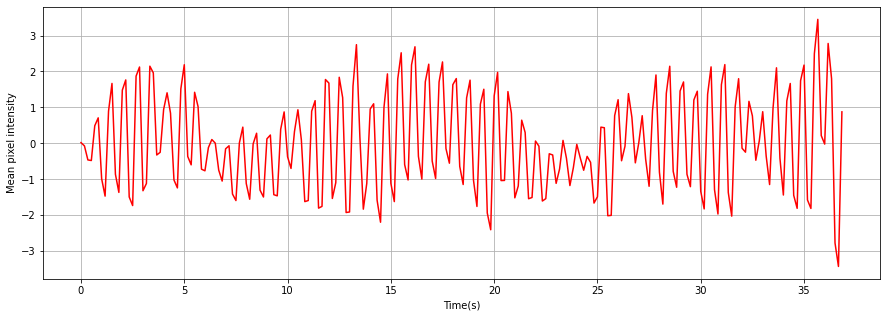

In [12]:
avg_red_2_1[:,1] = butter_bandpass_filter(avg_red_2_1[:,1], 0.1, 30, 100, 5)

fig, ax = plt.subplots(figsize=(15,5))
plt.plot(avg_red_2_1[:,0] ,avg_red_2_1[:,1],color ='red')
plt.xlabel('Time(s)')
plt.ylabel('Mean pixel intensity')
plt.grid(True)
plt.show

### 6. Fourier transform

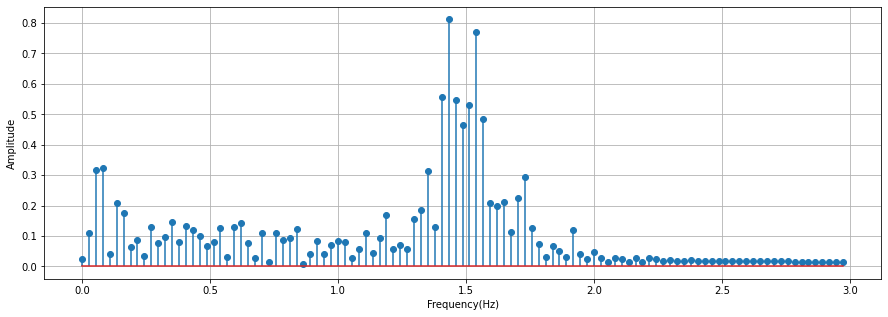

In [13]:
nfft = len(avg_red_2_1[:,0])
fs = 6                            #sampling rate = 6
df = fs/nfft
k = np.arange(nfft)
f = k*df

nfft_half = int(nfft/2)
f0 = f[range(nfft_half)]                  # only half size check for get hz. 
y = np.fft.fft(avg_red_2_1[:,1])/nfft*2   # 증폭을 두 배
y0 = y[range(nfft_half)]                  # one side. 
amp = abs(y0)                             # 벡터(복소수) norm 측정. 신호 강도. 

if True: 
    fig, ax = plt.subplots(figsize=(15,5))
    plt.grid(True)
    plt.stem(f0, amp)
    plt.xlabel('Frequency(Hz)')
    plt.ylabel('Amplitude')
    plt.show()

---

## Resuluts

### Heart rate measurement

In [14]:
x = pd.DataFrame()
x['Frequency'] = f0
x['Amplitude'] = amp

hr = x[x['Amplitude']== max(x['Amplitude'])]['Frequency'].values[0]*60

print('Heart Rate : {:.4f}'.format(hr))

Heart Rate : 85.9459


### Blood pressure measurement

<function matplotlib.pyplot.show(close=None, block=None)>

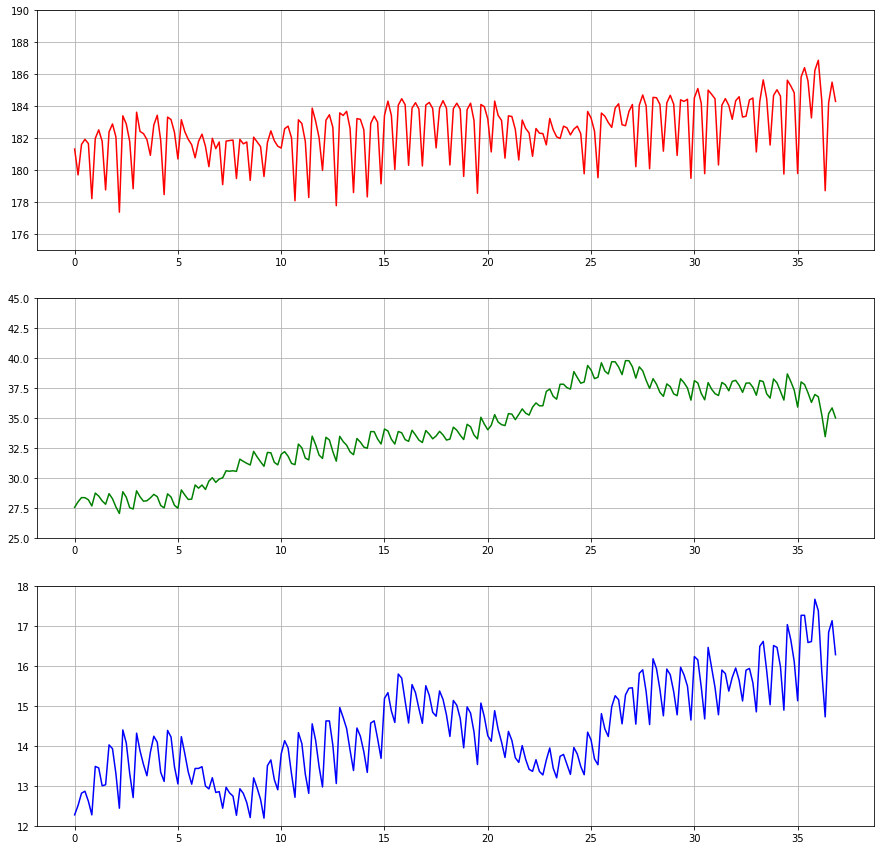

In [15]:
fig, ax = plt.subplots(3, 1, figsize=(15,15))

ax[0].plot(avg_red_2[:,0],avg_red_2[:,1], color = 'red')
ax[0].set_ylim(175,190)
ax[0].grid(True)

ax[1].plot(avg_green_2[:,0],avg_green_2[:,1], color = 'green')
ax[1].set_ylim(25,45)
ax[1].grid(True)

ax[2].plot(avg_blue_2[:,0],avg_blue_2[:,1], color = 'blue')
ax[2].set_ylim(12,18)
ax[2].grid(True)

plt.show

In [16]:
I_Tsys = min(avg_red_2[:,1])
I_Tdia = max(avg_red_2[:,1])
I_S = max(avg_red_2[:,1]) - min(avg_red_2[:,1])

In [17]:
SBP = -0.599*I_Tsys - 0.656*I_S + 249.942
DBP = -0.212*I_Tdia - 0.251*I_S + 153.211

In [18]:
print("SBP is : {}".format(SBP))

SBP is : 137.45902657591728


In [19]:
print("DBP is : {}".format(DBP))

DBP is : 111.20771749853631
